In [55]:
import emoji
import numpy as np
import matplotlib.pyplot as plt
import control as co
from scipy import signal
from IPython.display import Image
from IPython.core.display import HTML 
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

 ![logo](logouvp.png)

# Universidad del Valle de Puebla
## Sistemas de control inteligente

### 1. Modelo matemático de un motor de CD

Un motor de CD se modela considerando las partes eléctrica y mecánica. Como se sabe un motor esta compuesto de un embobinado que presenta una resistencia (R) e inductancia (L). Por otra parte se genera un voltaje contraelectromotriz $e(t)$ que está en función de la velocidad del motor $\omega$ y el flujo electromagnético $\phi$. Para modelar la parte mecánica se considera el coeficiente de inercia del eje del motor *J* y el par de carga $T_L$.

![motor1](img/motorCDv20.png)

Las ecuaciones que describen el modelo del motor, están determinadas por la **parte eléctrica**:


$$\begin{eqnarray*}
	v(t)&=&Ri(t)+L\frac{di(t)}{dt}+e(t)\\
    \label{ecmot} \tag{1}
	T_m(t)&=&J\frac{d\omega(t)}{dt}+B\omega(t)+T_L(t)
    \end{eqnarray*}$$

donde $v(t)$ es el voltaje aplicado al motor, $e(t)$ es el voltaje electromotriz inducido durante rotación del motor, $i(t)$ es la corriente del motor, $R$ y $L$ la resistencia e inductancia del embobinado, respectivamente y $B$ el coeficiente de fricción.

El voltaje de fuerza electromotriz del motor esta en función de la velocidad del motor $\omega$ y la constante $K_m$ del motor: 

$$\begin{equation}
e(t)=K_m \omega (t) 
\label{vcontra} \tag{2}
\end{equation}
$$ 

Por otra parte el par del motor está  determinado por:   

$$\begin{equation}
T_m(t)=K_m i(t)
\label{parm} \tag{3}
\end{equation}$$

Al sustituir (2) y (3), en (1), se obtiene: 

$$\begin{eqnarray*}
	v(t)=Ri(t)+L\frac{di(t)}{dt}+K_m\omega(t)\\
      \label{fin} \tag{4} 
	K_mi(t)=J\frac{d\omega}{dt}+B\omega(t)+T_L(t)
  	\end{eqnarray*}$$

despejando la derivada, 

$$\begin{eqnarray}
\label{modfin1}
\frac{di(t)}{dt}&=&\frac{v(t)}{L}-\frac{K_m}{L}\omega(t)-\frac{R}{L}i(t)\\
\frac{d\omega(t)}{dt}&=&\frac{K_m}{J}i(t)-\frac{B}{J}\omega(t)-\frac{T_L(t)}{J}
\label{modfin2}\tag{5}
\end{eqnarray}$$

### 2. Variables de estado 

	Los sistemas dinámicos lineales, se pueden representar con variables de estado:

$$\begin{eqnarray}
	\label{edo1}
	\dot{\textbf{x}}&=&\textbf{A}\cdot \textbf{x}+\textbf{B} \cdot \textbf{u} \\
	y&=&\textbf{C} \cdot \textbf{x}
	\label{edo2} \tag{6}
	\end{eqnarray} $$

El punto sobre el vector $x$ representa la derivada de las variables de estado. Sustituyendo las ecuaciones (4) en (6) se tiene, con $T_L=0$:

$$\begin{equation}
	 \begin{bmatrix}
	  di(t)/{dt} \\
	  d\omega(t)/{dt}
	 \end{bmatrix}
	 =
	 \begin{bmatrix}
	 -R/L & -K_m/L\\
	 K_m/J &-B/J	 
	 \end{bmatrix}
	 \begin{bmatrix}
	  i(t) \\
	 \omega(t)
	 \end{bmatrix}
	 +
	 \begin{bmatrix}
	 1/L\\
	 0 
	 \end{bmatrix}
	 v(t)
	\end{equation}
    \tag{7}
$$

Haciendo un cambio de variable, $x_1=i(t)$ y $x_2=\omega(t)$, se obtiene:

$$\begin{equation}
	 \begin{bmatrix}
	  \dot{x}_1 \\
	  \dot{x}_2 
	 \end{bmatrix}
	 =
	 \begin{bmatrix}
	 -R/L & -K_m/L\\
	 K_m/J &-B/J	 
	 \end{bmatrix}
	 \begin{bmatrix}
	  x_1(t) \\
	 x_2(t)
	 \end{bmatrix}
	 +
	 \begin{bmatrix}
	 1/L\\
	 0 
	 \end{bmatrix}
	 v(t)
	\end{equation}
    \tag{8}
$$

la salida esta determinada por la siguiente ecuación,

$$	\begin{equation}
	 y=
	 \begin{bmatrix}
	  0&1
	 \end{bmatrix}	
	  \begin{bmatrix}
	 x_1(t) \\
	 x_2(t)
	 \end{bmatrix}
	\end{equation}$$

### 3. Valores experimentales  

![tabla](img/tab_valores.png)

Sustituyendo los valores de la tabla anterior en (8), se obtiene:

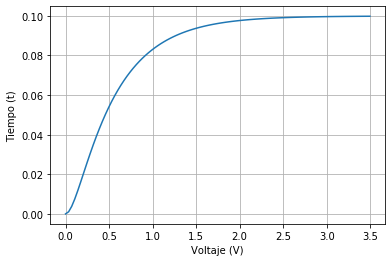

In [94]:
R=1; L=0.5; J=0.01; b=0.1; Km=0.01;

A=[[-R/L, -Km/L],[Km/J, -b/J]]
B=[[1/L],[0]]
C=[0,1]
D=0
sys2=signal.StateSpace(A,B,C,D)
t2,y2=signal.step(sys2)

plt.plot(t2,y2)
#plt.plot(t2, [1 for i in t2])
plt.grid()
plt.xlabel('Voltaje (V)')
plt.ylabel('Tiempo (t)')
#plt.ylim(0,1.20)
#plt.xlim(0,3)
plt.show()


Ahora se obtiene la funcion de transferencia del modelo del motor y se obtiene la respuesta del sistema.

C:\Users\jacob\anaconda3\lib\site-packages\scipy\signal\filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


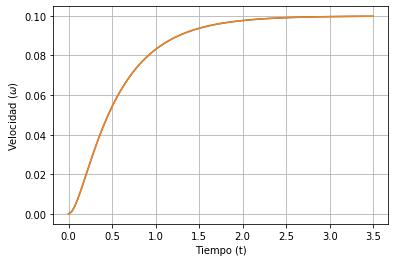

In [95]:
sys=signal.ss2tf(A,B,C,D)
t3,y3=signal.step(sys)
plt.plot(t3,y3)
plt.plot(t2,y2)
#plt.plot(t2, [1 for i in t2])
plt.grid()
plt.ylabel('Velocidad ($\omega$)')
plt.xlabel('Tiempo (t)')
#plt.ylim(0,1.20)
#plt.xlim(0,3)
plt.show()

In [140]:
sys

(array([[0., 0., 2.]]), array([ 1.  , 12.  , 20.02]))

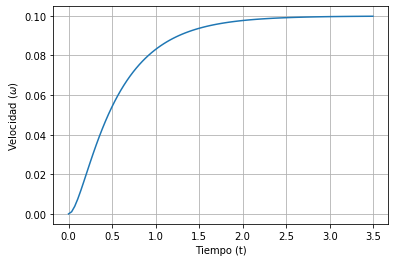

In [141]:
systf = co.tf([2], [1, 12 ,20.02]) # Creamos el sistema mediante la función de transferencia.
t,y=co.step_response(systf)
plt.plot(t,y)
#plt.plot(t2, [1 for i in t2])
plt.grid()
plt.ylabel('Velocidad ($\omega$)')
plt.xlabel('Tiempo (t)')
#plt.ylim(0,1.20)
#plt.xlim(0,3)
plt.show()

In [142]:
systf


        2
------------------
s^2 + 12 s + 20.02

Pero todas las respuestas anteriores, se obtienen con una señal de entrada que se aplica a un sistema en lazo abierto, 
como se muestra en la siguiente figura.

![motor_lzoA](img/motor_ol.png)

Pero lo que se desea es que la señal de salida, siga a la señal de entrada. Para lo cual se empleará un sensor que mide la velocidad del motor y se compare con la señal de referencia.

![motor_lc](img/motor_retro2.png)

In [143]:
sysr=co.feedback(systf,1,-1)

In [144]:
sysr


        2
------------------
s^2 + 12 s + 22.02

La respuesta del sistema retroalimentado es la siguiente:

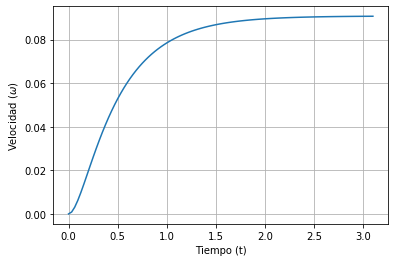

In [145]:
t,y=co.step_response(sysr)
plt.plot(t,y)
#plt.plot(t2, [1 for i in t2])
plt.grid()
plt.ylabel('Velocidad ($\omega$)')
plt.xlabel('Tiempo (t)')
#plt.ylim(0,1.20)
#plt.xlim(0,3)
plt.show()

Pero la respuesta casi no presenta cambios. Ahora vamos a incrementar la ganancia, es decir multiplicamos por 10 la función de transferencia y se obtiene.

In [162]:
ganancia=widgets.IntSlider(
    value=10,
    min=1,
    max=150,
    step=1,
    description='Ganancia:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(ganancia)

IntSlider(value=10, continuous_update=False, description='Ganancia:', max=150, min=1)

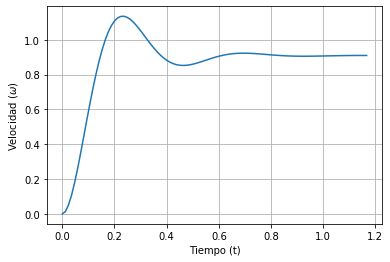

In [176]:
systf=co.tf([0.000000000000002*ganancia.value, 2*ganancia.value], [1, 12 ,20.02])
sysrg=co.feedback(systf,1)
tr,yr=co.step_response(sysrg)
plt.plot(tr,yr)
#plt.plot(t2, [1 for i in t2])
plt.grid()
plt.ylabel('Velocidad ($\omega$)')
plt.xlabel('Tiempo (t)')
#plt.ylim(0,1.20)
#plt.xlim(0,3)
plt.show()

In [178]:
sysrg


  2e-13 s + 200
----------------
s^2 + 12 s + 220